In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# นำเข้า Library และ Load ข้อมูล

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/K-DAI/ปี 1 เทอม 2/05177001 Linear Algebra for Data Science/PJ_Mid/insurance.csv')
#df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## ตรวจสอบค่า Null

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.shape

(1338, 7)

## ตรวจสอบชนิดข้อมูล

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## เปลี่ยนข้อมูล categorical  ให้เป็น Dummy

In [ ]:
df['sex'] = df['sex'].replace('female',0 )
df['sex'] = df['sex'].replace('male',1)
df['smoker'] = df['smoker'].replace('yes', 1)
df['smoker'] = df['smoker'].replace('no', 0)
df['region'] = df['region'].replace('northeast', 0)
df['region'] = df['region'].replace('northwest', 1)
df['region'] = df['region'].replace('southeast', 2)
df['region'] = df['region'].replace('southwest', 3)
print(df)

      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]


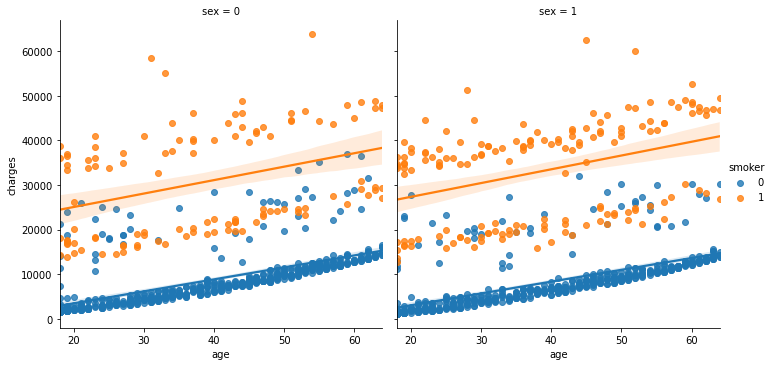

In [ ]:
sns.lmplot(data=df, x='age', y='charges', col='sex', hue='smoker') #scatter + linear plot

จากข้อมูลที่ได้มา จะสังเกตว่ายิ่งลูกค้าอายุเพิ่มขึ้นก็มีแนวโน้มที่จะจ่ายค่าเบี้ยประกันแพงขึ้น และ คนที่สูบบุหรี่ ก็มีแนวโน้มที่จะจ่ายเบี้ยประกันแพงกว่าคนที่ไม่สูบบุหรี่ เช่นกัน

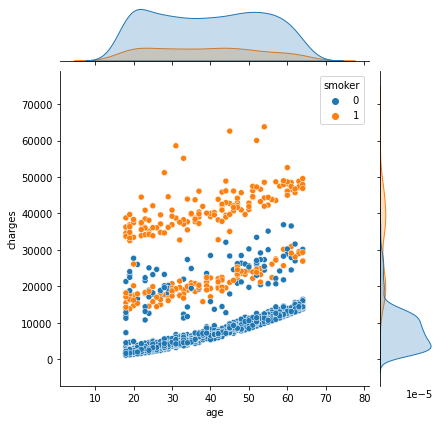

In [ ]:
sns.jointplot(data=df, x='age', y = 'charges', hue='smoker') #ใช้กรณีดู disribution ของข้อมูล

จากข้อมูลที่ได้มา กราฟนี้แสดงถึงความหนาแน่นและการทับซ้อนของข้อมูล จะสังเกตว่าทุกช่วงอายุนั้นจำนวนคนที่ ไม่สูบบุหรี่ นั้นมีจำนวนมากกว่า คนที่สูบบุหรี่ และ จำนวนคนที่ไม่สูบบุหรี่นั้นส่วนใหญ่จะมีแนวโน้มกระจุกตัวอยู่ช่วง เบี้ยประกัน 0 - 15000 ดอลลาร์

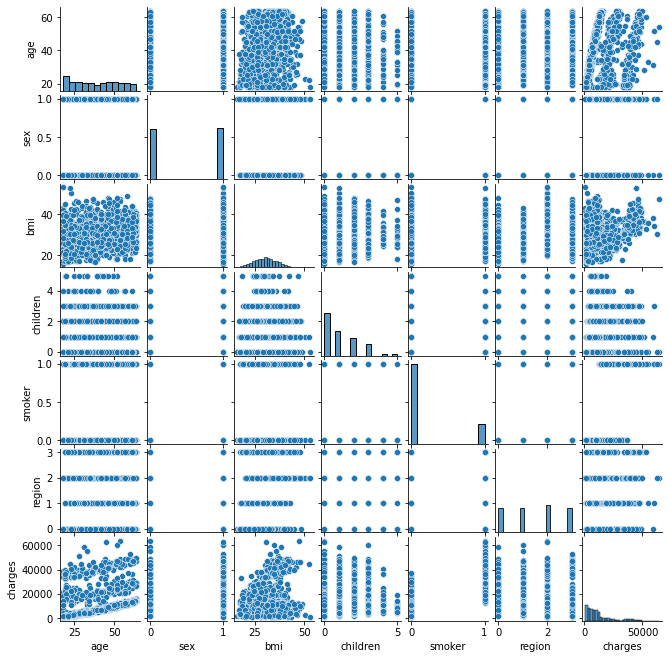

In [ ]:
 g = sns.pairplot(df)
 g.fig.set_size_inches(9,9)

## ดูความสัมพันธ์ของข้อมูล

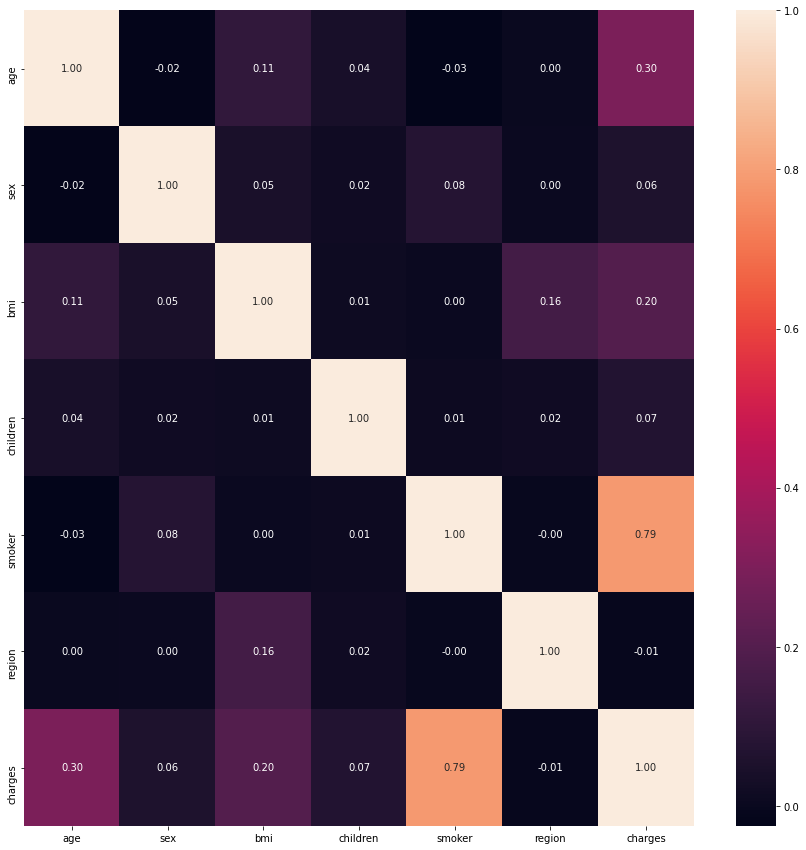

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data=df.corr(), annot=True, fmt=".2f")

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## ประกาศตัวแปร x และ y

In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=["charges"])
y = df["charges"]

## ตรวจสอบ MultiCollinearity ที่มีความสัมพันธ์กันเอง > 0.7

In [ ]:
thershold = 0.7
corr_mat = x.corr().abs() # ค่าความสัมพันธ์ทางบวก
upper = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool)) # ทำสามเหลี่ยมบน ไม่เอา diagonal
drop = [column for column in upper.columns if any(upper[column] > thershold)] # เก็บค่าที่มากกว่า thershold
print(f"MultiCollinearity {thershold}: {drop}")

MultiCollinearity 0.7: []


## แบ่งข้อมูล Train 70% Test 30%  และ fix ค่าแบ่งให้คงที่

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.3, random_state=100) # train = 70%, test = 30 %, randomstate = fix ค่าตัวแบ่งให้ได้ตัวเดิม

In [ ]:
print(x_train1.shape, x_test1.shape, y_train1.shape, y_test1.shape)

(936, 6) (402, 6) (936,) (402,)


# สร้าง Model 1

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression() # ย่อชื่อ

## ป้อน Input Output ให้ model เรียนรู้

In [ ]:
%%time
m1 = LR.fit(x_train1, y_train1) # ป้อน Input Output ให้ model เรียนรู้

CPU times: user 1.83 ms, sys: 2.93 ms, total: 4.76 ms
Wall time: 15.3 ms


In [ ]:
print(m1.coef_)
print(m1.intercept_)

[ 2.59634761e+02 -5.43235302e-02  2.93390832e+02  4.67684029e+02
  2.40111697e+04 -4.99424941e+02]
-10428.119803691554


In [ ]:
list(zip(df.columns, m1.coef_)) 

[('age', 259.63476074356345),
 ('sex', -0.05432353020813707),
 ('bmi', 293.3908322847946),
 ('children', 467.6840290575744),
 ('smoker', 24011.169706114357),
 ('region', -499.42494071338626)]

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## ทำนายผล y จาก x (train) และ ค่า RMSE

In [ ]:
%%time
y_train_pred1 = m1.predict(x_train1) # ทำนายผล y_train1 จาก x_train1

CPU times: user 1.12 ms, sys: 6 µs, total: 1.13 ms
Wall time: 1.27 ms


In [ ]:
from sklearn.metrics import *
from math import sqrt

In [ ]:
mse = mean_squared_error(y_train1, y_train_pred1) # ดูค่า Output เทียบกับ ค่า ทำนาย (train)
rmse = sqrt(mse)
print(mse)
print(rmse)

38570477.77902456
6210.513487548719


In [ ]:
import statsmodels.api as sm
x_train1 = sm.add_constant(x_train1)  # เพิ่ม ค่าคงที่ constant เข้ามา
m1_train = sm.OLS(y_train1, x_train1).fit() 
print(m1_train.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     435.6
Date:                Fri, 17 Sep 2021   Prob (F-statistic):          5.63e-266
Time:                        05:29:05   Log-Likelihood:                -9503.1
No. Observations:                 936   AIC:                         1.902e+04
Df Residuals:                     929   BIC:                         1.905e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.043e+04   1150.477     -9.064      0.0

## R^2 (train)

In [ ]:
print(f"R^2 = {m1_train.rsquared*100:.2f} %")
print(f"Adj R^2 = {m1_train.rsquared_adj*100:.2f} %")  # Multiple Linear Regression เน้นดู Adjusted R^2 เป็นหลัก (เพราะเมื่อเพิ่ม feature x เยอะๆ ค่า Adj R^2 จะไม่เพิ่มขึ้นเหมือน R^2)

R^2 = 73.78 %
Adj R^2 = 73.61 %


In [ ]:
m1_train.params 
# สูตร  y = -10428.119804 + 259.634761(age) + -0.054324(sex) + 293.390832(bmi) + 467.684029(children) + 24011.169706(smoker) + -499.424941(region)

const      -10428.119804
age           259.634761
sex            -0.054324
bmi           293.390832
children      467.684029
smoker      24011.169706
region       -499.424941
dtype: float64

## ทำนายผล y จาก x (test) และ ค่า RMSE

In [ ]:
%%time
y_test_pred1 = m1.predict(x_test1) # ทำนายผล x_test

CPU times: user 1.18 ms, sys: 0 ns, total: 1.18 ms
Wall time: 1.35 ms


In [ ]:
mse2 = mean_squared_error(y_test1, y_test_pred1) # ดูค่า Output เทียบกับ ค่า ทำนาย (test)
rmse2 = sqrt(mse2)
print(mse2)
print(rmse2)

32191230.365719207
5673.731608537648


In [ ]:
import statsmodels.api as sm
x_test1 = sm.add_constant(x_test1)
m1_test = sm.OLS(y_test1, x_test1).fit()
print(m1_test.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     244.5
Date:                Fri, 17 Sep 2021   Prob (F-statistic):          1.23e-129
Time:                        05:29:05   Log-Likelihood:                -4036.3
No. Observations:                 402   AIC:                             8087.
Df Residuals:                     395   BIC:                             8114.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.549e+04   1703.038     -9.094      0.0

## R^2 (test)

In [ ]:
print(f"R^2 = {m1_test.rsquared*100:.2f} %")
print(f"Adj R^2 = {m1_test.rsquared_adj*100:.2f} %")

R^2 = 78.79 %
Adj R^2 = 78.47 %


In [ ]:
m1_test.params

const      -15487.644191
age           253.603398
sex          -472.085984
bmi           437.351896
children      540.580357
smoker      23618.109954
region        -30.781038
dtype: float64

# สร้าง MODEL 2

##  กำจัด ตัวแปรที่ไม่มีนัยสำคัญเชิงสติถิ และ Normalization

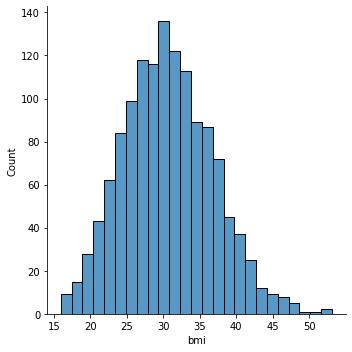

In [ ]:
sns.displot(df["bmi"]) 

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

กราฟเบ้ขวา 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


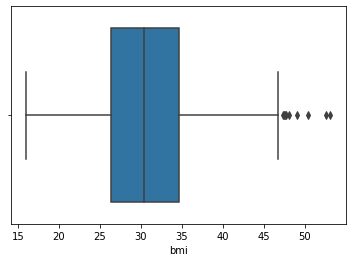

In [ ]:
sns.boxplot(df["bmi"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


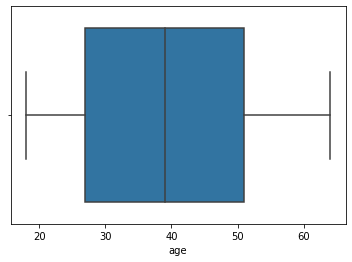

In [ ]:
sns.boxplot(df["age"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


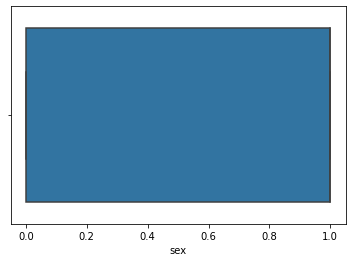

In [ ]:
sns.boxplot(df["sex"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


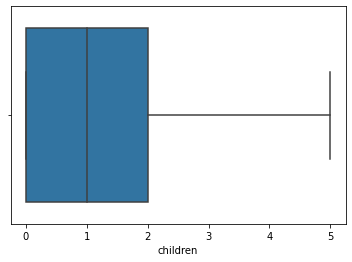

In [ ]:
sns.boxplot(df["children"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


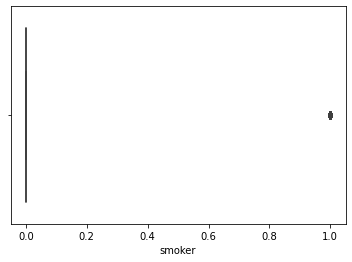

In [ ]:
sns.boxplot(df["smoker"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


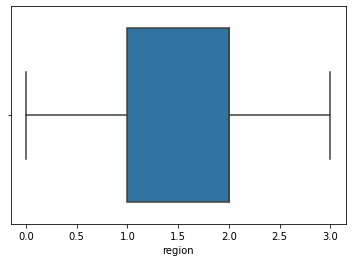

In [ ]:
sns.boxplot(df["region"])

มี Outlier 1.5*IQR  เป็น Outlier อ่อนๆ และสมัยนี้คนน้ำหนักเกินกว่าเกณฑ์กันเป็นจำนวนมากจึงไม่ควรลบทิ้งไป

In [ ]:
#q3_label_x3 = df["bmi"].quantile(.75)
#q1_label_x3 = df["bmi"].quantile(.25)
#IQR_x3 = q3_label_x3 - q1_label_x3
#thershold_outlier_max_x3 = q3_label_x3 + 1.5*IQR_x3
#thershold_outlier_min_x3 = q1_label_x3 - 1.5*IQR_x3

#print(thershold_outlier_min_x3, thershold_outlier_max_x3)

In [ ]:
#df_x_out = df[df["bmi"] <= thershold_outlier_max_x3] 

In [ ]:
#df_x_out

In [ ]:
#df.shape

In [ ]:
#sns.boxplot(df_x_out["bmi"])

In [ ]:
#sns.displot(df_x_out["bmi"])

## Normalization

In [ ]:
from sklearn.model_selection import train_test_split
#x2 = df_x_out.drop(columns=["charges"])
#y2 = df_x_out["charges"]
x2 = df.drop(columns=["charges","sex","region"]) # sex, region ค่า P-value  > 0.05
y2 = df["charges"]

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler 
scale = StandardScaler()
df_outnorm = scale.fit_transform(x2)  # ทำ Z-score
df_outnorm = pd.DataFrame(df_outnorm)
print(df_outnorm)

             0         1         2         3
0    -1.438764 -0.453320 -0.908614  1.970587
1    -1.509965  0.509621 -0.078767 -0.507463
2    -0.797954  0.383307  1.580926 -0.507463
3    -0.441948 -1.305531 -0.908614 -0.507463
4    -0.513149 -0.292556 -0.908614 -0.507463
...        ...       ...       ...       ...
1333  0.768473  0.050297  1.580926 -0.507463
1334 -1.509965  0.206139 -0.908614 -0.507463
1335 -1.509965  1.014878 -0.908614 -0.507463
1336 -1.296362 -0.797813 -0.908614 -0.507463
1337  1.551686 -0.261388 -0.908614  1.970587

[1338 rows x 4 columns]


In [ ]:
x2

,age,bmi,children,smoker
0,19,27.900,0,1
1,18,33.770,1,0
2,28,33.000,3,0
3,33,22.705,0,0
4,32,28.880,0,0
...,...,...,...,...
1333,50,30.970,3,0
1334,18,31.920,0,0
1335,18,36.850,0,0
1336,21,25.800,0,0


## แบ่งข้อมูล Train 70% Test 30%  และ fix ค่าแบ่งให้คงที่

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3, random_state=100)

In [ ]:
print(x_train2.shape, x_test2.shape, y_train2.shape, y_test2.shape)

(936, 4) (402, 4) (936,) (402,)


In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

## ป้อน Input Output ให้ model เรียนรู้

In [ ]:
%%time
m2 = LR.fit(x_train2, y_train2) # ป้อน Input Output ให้ model เรียนรู้

CPU times: user 1.96 ms, sys: 919 µs, total: 2.88 ms
Wall time: 2.57 ms


In [ ]:
print(m2.coef_)
print(m2.intercept_)

[  259.75806744   277.96019232   461.45219356 23983.13622414]
-10712.749169376128


In [ ]:
list(zip(x2.columns, m2.coef_))

[('age', 259.75806743997003),
 ('bmi', 277.96019232177173),
 ('children', 461.4521935555904),
 ('smoker', 23983.136224135273)]

## ทำนายผล y จาก x (train) และ ค่า RMSE

In [ ]:
%%time
y_train_pred2 = m2.predict(x_train2)

CPU times: user 1.16 ms, sys: 10 µs, total: 1.17 ms
Wall time: 1.34 ms


In [ ]:
from sklearn.metrics import *
from math import sqrt

In [ ]:
mse3 = mean_squared_error(y_train2, y_train_pred2)
rmse3 = sqrt(mse3)
print(mse3)
print(rmse3)

38859195.71240648
6233.714439433882


In [ ]:
import statsmodels.api as sm
x_train2 = sm.add_constant(x_train2)
m2_train = sm.OLS(y_train2, x_train2).fit()
print(m2_train.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     648.2
Date:                Fri, 17 Sep 2021   Prob (F-statistic):          2.76e-267
Time:                        05:29:07   Log-Likelihood:                -9506.6
No. Observations:                 936   AIC:                         1.902e+04
Df Residuals:                     931   BIC:                         1.905e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.071e+04   1138.152     -9.412      0.0

## R^2 (train)

In [ ]:
print(f"R^2 = {m2_train.rsquared*100:.2f} %")
print(f"Adj R^2 = {m2_train.rsquared_adj*100:.2f} %")

R^2 = 73.58 %
Adj R^2 = 73.47 %


## ทำนายผล y จาก x (test) และ ค่า RMSE

In [ ]:
%%time
y_test_pred2 = m2.predict(x_test2)

CPU times: user 1.19 ms, sys: 83 µs, total: 1.27 ms
Wall time: 1.4 ms


In [ ]:
mse4 = mean_squared_error(y_test2, y_test_pred2)
rmse4 = sqrt(mse4)
print(mse4)
print(rmse4)

31925237.25654526
5650.2422298999945


เมื่อทำการลบค่า x ที่ไม่มีนัยสำคัญทางสถิติ sex, region และทำ Standardization เปรียบเทียบค่า Adj R^2  = 78.47 % (RMSE = 5673.73) จาก model 1 และ Adj R^2 = 78.54 % (RMSE = 5650.24) จาก model 2

เปรียบเทียบเวลา Coding ข้อมูล 1338  records 
1.  เวลาที่ใช้ใน Model 1 = 3.86 + 1.99 + 1.96 = 7.81 ms
2.  เวลาที่ใช้ใน Model 2 = 4.25 + 4.42 + 1.83 = 10.5 ms



# สร้าง MODEL 3

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

x3 = df.drop(columns=['age', 'sex', 'bmi', 'children', 'region', 'charges']) # smoker มีค่า Correlation สูงที่สุด = 0.79
y3 = df["charges"]


## แบ่งข้อมูล Train 70% Test 30%  และ fix ค่าแบ่งให้คงที่

In [ ]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.3, random_state=100)

In [ ]:
print(x_train3.shape, x_test3.shape, y_train3.shape, y_test3.shape)

(936, 1) (402, 1) (936,) (402,)


In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

## ป้อน Input Output ให้ model เรียนรู้

In [ ]:
m3 = LR.fit(x_train3, y_train3) # ป้อน Input Output ให้ model เรียนรู้

In [ ]:
print(m3.coef_)
print(m3.intercept_)

[23946.49304499]
8512.964143143237


In [ ]:
list(zip(x3.columns, m3.coef_))

[('smoker', 23946.493044988627)]

## ทำนายผล y จาก x (train) และ ค่า RMSE

In [ ]:
%%time
y_train_pred3 = m3.predict(x_train3)

CPU times: user 977 µs, sys: 0 ns, total: 977 µs
Wall time: 1.19 ms


In [ ]:
from sklearn.metrics import *
from math import sqrt

In [ ]:
mse5 = mean_squared_error(y_train2, y_train_pred2)
rmse5 = sqrt(mse5)
print(mse5)
print(rmse5)

38859195.71240648
6233.714439433882


In [ ]:
import statsmodels.api as sm
x_train3 = sm.add_constant(x_train3)
m3_train = sm.OLS(y_train3, x_train3).fit()
print(m3_train.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     1465.
Date:                Fri, 17 Sep 2021   Prob (F-statistic):          1.60e-193
Time:                        05:29:07   Log-Likelihood:                -9688.1
No. Observations:                 936   AIC:                         1.938e+04
Df Residuals:                     934   BIC:                         1.939e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8512.9641    275.884     30.857      0.0

## R^2 (train)

In [ ]:
print(f"R^2 = {m3_train.rsquared*100:.2f} %")
print(f"Adj R^2 = {m3_train.rsquared_adj*100:.2f} %")

R^2 = 61.07 %
Adj R^2 = 61.02 %


## ทำนายผล y จาก x (test) และ ค่า RMSE

In [ ]:
%%time
y_test_pred3 = m3.predict(x_test3)

CPU times: user 1.05 ms, sys: 2 µs, total: 1.05 ms
Wall time: 1.01 ms


In [ ]:
mse6 = mean_squared_error(y_test3, y_test_pred3)
rmse6 = sqrt(mse6)
print(mse6)
print(rmse6)

52253280.865529776
7228.643086052166


# L1 - Lasso Regularization

feture selection จะตัดตัวแปรที่ไม่สำคัญออกไป สามารถกำหนด ให้ค่า ส.ป.ส. หน้า feature เป็น 0 ได้

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
LR_L1 = Lasso() # default alpha = 1

In [ ]:
%%time
m4 = LR_L1.fit(x_train2, y_train2)

CPU times: user 1.57 ms, sys: 989 µs, total: 2.56 ms
Wall time: 3.06 ms


In [ ]:
%%time
y_test_pred3 = LR_L1.predict(x_test2)

ValueError: ignored

In [ ]:
from sklearn.metrics import *
from math import sqrt

In [ ]:
mse3 = mean_squared_error(y_test2, y_test_pred3)
rmse3 = sqrt(mse3)
print(mse3)
print(rmse3)

In [ ]:
print(m4.intercept_)

In [ ]:
list(zip(x2.columns, m4.coef_))

In [ ]:
r2 = m4.score(x_test2,y_test2)
print(f"R^2 = {r2*100:.2f} %")

ข้อมูล model 2 จะได้ RMSE 5650.156471593312 R^2 = 78.01 %

ข้อมูล model 1 จะได้ RMSE 5673.529598758564 R^2 = 77.83 %

# L2 - Ridge Regularization

feture selection จะตัดตัวแปรที่ไม่สำคัญออกไป สามารถกำหนด ให้ค่า ส.ป.ส. หน้า feature เป็น 0 ไม่ได้ แต่ใกล้เคียงได้

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
LR_L2 = Ridge() # alpha = 1

In [ ]:
%%time
m5 = LR_L2.fit(x_train2, y_train2)

In [ ]:
%%time
y_test_pred4 = LR_L2.predict(x_test2)

In [ ]:
from sklearn.metrics import *
from math import sqrt

In [ ]:
mse4 = mean_squared_error(y_test2, y_test_pred4)
rmse4 = sqrt(mse4)
print(mse4)
print(rmse4)

In [ ]:
print(m5.intercept_)

In [ ]:
list(zip(x2.columns, m5.coef_))

In [ ]:
r3 = m5.score(x_test2,y_test2)
print(f"R^2 = {r3*100:.2f} %")

ข้อมูล model 2 จะได้ RMSE 5647.745411401587 R^2 = 78.03 %

ข้อมูล model 1 จะได้ RMSE 5670.70832725905 R^2 = 77.85 %

## Elastic Net (L1+L2)

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
LR_L1_L2 = ElasticNet(l1_ratio = 1) # alpha = 1

In [ ]:
%%time
m6 = LR_L1_L2.fit(x_train2, y_train2)

In [ ]:
%%time
y_test_pred5 = LR_L1_L2.predict(x_test2)

In [ ]:
from sklearn.metrics import *
from math import sqrt

In [ ]:
mse5 = mean_squared_error(y_test2, y_test_pred5)
rmse5 = sqrt(mse5)
print(mse5)
print(rmse5)

In [ ]:
r4 = m6.score(x_test2,y_test2)
print(f"R^2 = {r4*100:.2f} %")

In [ ]:
print(m6.intercept_)

In [ ]:
list(zip(x2.columns, m6.coef_))

ข้อมูล model 2 จะได้ RMSE 5650.156471593312 R^2 = 78.01 %

ข้อมูล model 1 จะได้ RMSE 5673.529598758564 R^2 = 77.83 %